# Creando nuestro propio KNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter

In [2]:
dataset = {
    'k':[[1,2],[2,3],[3,1]],
    'r':[[6,5],[7,7],[8,6]]
}
new_point = [5,7]

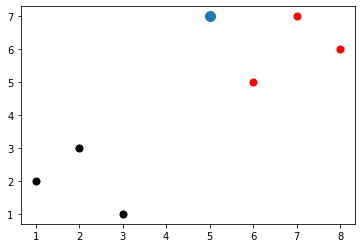

In [3]:
[[plt.scatter(ii[0],ii[1], s=50, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0], new_point[1], s=100)

In [24]:
def k_nearest_neighbors(data, predict, k=3, verbose=False):
    
    if len(data) >= k:
        warningsngs.warn("K es un valor menor que el número total de elementos a votar!!")
    
    distances = []
    for group in data:
        for feature in data[group]:
            #d = sqrt((feature[0]-predict[0])**2 + (feature[1]-predict[1])**2)
            #d = np.sqrt(np.sum((np.array(features)-np.array(predict))**2))
            d = np.linalg.norm(np.array(feature)-np.array(predict))
            distances.append([d, group])
    if verbose:
        print(distances)
    
    votes = [i[1] for i in sorted(distances)[:k]] #sorted ordena por la distancia
    if verbose:
        print(votes) 
    
    vote_result = Counter(votes).most_common(1)
    if verbose:
        print(vote_result)
    
    return vote_result[0][0]

In [5]:
result = k_nearest_neighbors(dataset, new_point)
result

[[6.4031242374328485, 'k'], [5.0, 'k'], [6.324555320336759, 'k'], [2.23606797749979, 'r'], [2.0, 'r'], [3.1622776601683795, 'r']]
['r', 'r', 'r']
[('r', 3)]


'r'

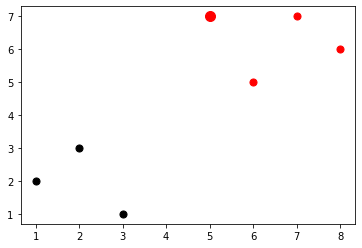

In [6]:
[[plt.scatter(ii[0],ii[1], s=50, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0], new_point[1], s=100, color=result)

# Aplicando nuestro KNN al dataset del cancer

In [7]:
import pandas as pd

In [8]:
mainpath = "C:/Users/Esneider Infante/Documentos/Python Machine Learning Udemy/python-ml-course/datasets/"
filename = "cancer/breast-cancer-wisconsin.data.txt"
fullpath = mainpath+filename
df = pd.read_csv(fullpath, header=None)

In [9]:
df.replace("?",-99999, inplace=True)

In [10]:
df.columns= ["name","V1","V2","V3","V4","V5","V6","V7","V8","V9","class"]

In [11]:
df.drop(["name"],1,inplace=True)

C:\Users\ESNEID~1\AppData\Local\Temp/ipykernel_6040/3725490659.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(["name"],1,inplace=True)


In [12]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [15]:
#Convertir dataset en array
full_data = df.astype(float).values.tolist()

In [14]:
full_data

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0],
 [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 10.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 5.0, 2.0],
 [4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [5.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 7.0, 5.0, 10.0, 7.0, 9.0, 5.0, 5.0, 4.0, 4.0],
 [7.0, 4.0, 6.0, 4.0, 6.0, 1.0, 4.0, 3.0, 1.0, 4.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [10.0, 7.0, 7.0, 6.0, 4.0, 10.0, 4.0, 1

In [16]:
#particionar datos
import random

In [17]:
random.shuffle(full_data)

In [18]:
test_size = 0.2

In [19]:
train_set = {2:[],4:[]}
test_set = {2:[],4:[]}

In [20]:
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

In [22]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])
    
for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [23]:
train_set

{2: [[3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 2.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [5.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 1.0],
  [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [1.0, 1.0, 2.0, 1.0, 2.0, 2.0, 4.0, 2.0, 1.0],
  [3.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0],
  [5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [6.0, 6.0, 6.0, 9.0, 6.0, -99999.0, 7.0, 8.0, 1.0],
  [3.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [7.0, 1.0, 2.0, 3.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 3.0, 1.0, 1.0, 3.0, 1.0, 1.0],
  [1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [1.0, 2.0, 1.0, 3.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [3.0, 1.0,

In [25]:
correct = 0
total = 0
for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data, k=5)
        if group==vote:
            correct+=1
        total +=1
print("Eficacia del KNN = ", correct/total)

Eficacia del KNN =  0.9712230215827338
